# Импорт библиотек

In [79]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import duckdb
import gdown

# Загрузка файлов

In [80]:
!gdown --id 10PmL3KV9kPecDldkBSXcKf4XlpkhSIof
!gdown --id 1DsIoq0DpdAySN2-EBWppQn-TN99DXUJh
!gdown --id 1CVCjEtI_a76euvSYo6iArMTQVE204DH_
!gdown --id 1rUqsp3z99ROl6pPNGi_5toeMM1XS9TNo

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10PmL3KV9kPecDldkBSXcKf4XlpkhSIof
To: /content/clients.csv
100% 299k/299k [00:00<00:00, 11.9MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DsIoq0DpdAySN2-EBWppQn-TN99DXUJh
To: /content/categories.csv
100% 5.22k/5.22k [00:00<00:00, 19.7MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://dri

# Загрузка датасетов

In [81]:
clients = pd.read_csv('/content/clients.csv')
categories = pd.read_csv('/content/categories.csv')
subscriptions = pd.read_csv('/content/subscriptions.csv')
transactions = pd.read_csv('/content/transactions.csv',index_col = 0)

# Размеры данных

In [82]:
pd.DataFrame({"Clients": [clients.shape],"Transactions": [transactions.shape],"Categories": [categories.shape],
              "Subscriptions": [subscriptions.shape]}, index=["Размер"])

,Clients,Transactions,Categories,Subscriptions
Размер,"(1000, 13)","(929135, 7)","(29, 4)","(1308, 7)"


#Осмотр данных

Клиенты

In [83]:
clients.head(5)

,id,fullname,address,phone_number,email,workplace,birthdate,registration_date,gender,income,expenses,credit,deposit
0,1,Волкова Фаина Афанасьевна,"с. Новосибирск, наб. Привокзальная, д. 58 к. 5...",8 (475) 014-6494,wkirillov@rambler.ru,"ст. Кировск (Мурм.), ш. Коммуны, д. 238 стр. 3...",1966-09-07,2017-01-10,F,230910.0,61975,1.0,NaN
1,2,Пелагея Вячеславовна Галкина,"клх Белокуриха, ш. Комсомольское, д. 701 стр. ...",+7 (981) 576-1146,bogdanovmoke@rambler.ru,"г. Елабуга, бул. 60 лет Октября, д. 5, 070955",1987-05-23,2016-07-14,F,NaN,75232,NaN,NaN
2,3,Валентина Игоревна Фомина,"к. Усть-Катав, бул. Восточный, д. 292 стр. 3, ...",+7 (920) 068-58-36,mjasnikovvalentin@mail.ru,"г. Сосновый Бор, алл. Лесхозная, д. 146, 139446",1974-06-15,2017-10-18,F,NaN,88813,NaN,NaN
3,4,тов. Воронцова Фёкла Федоровна,"клх Новая Игирма, алл. Пограничная, д. 6/6, 73...",8 334 398 3828,martin85@rambler.ru,"клх Котельнич, бул. Серафимовича, д. 97, 753076",1979-10-19,2012-08-25,F,NaN,55167,NaN,NaN
4,5,Филипп Дмитриевич Воронцов,"к. Ребриха, пр. Свободы, д. 54, 466509",8 (296) 455-0453,jan_07@rambler.ru,"клх Карабудахкент, ул. Абрикосовая, д. 3 к. 19...",1986-08-14,2017-03-15,M,NaN,85106,NaN,NaN


In [84]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   fullname           1000 non-null   object 
 2   address            1000 non-null   object 
 3   phone_number       1000 non-null   object 
 4   email              1000 non-null   object 
 5   workplace          1000 non-null   object 
 6   birthdate          1000 non-null   object 
 7   registration_date  1000 non-null   object 
 8   gender             1000 non-null   object 
 9   income             364 non-null    float64
 10  expenses           1000 non-null   int64  
 11  credit             364 non-null    float64
 12  deposit            376 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [85]:
clients['id'].nunique() #Уникальные клиенты

1000

In [86]:
clients.isnull().sum() #Пропущенные значения

,0
id,0
fullname,0
address,0
phone_number,0
email,0
workplace,0
birthdate,0
registration_date,0
gender,0
income,636


Транзакции

In [87]:
transactions.head(5)

,client_id,product_category,product_company,subtype,amount,date,transaction_type
34478,37,29,NaN,Автоплатеж,1209,2020-01-01 00:00:00,Negative
65406,71,4,YouTube Music,Подписка,169,2020-01-01 00:00:00,Negative
82186,88,29,NaN,Автоплатеж,3711,2020-01-01 00:00:00,Negative
83113,89,29,NaN,Автоплатеж,6443,2020-01-01 00:00:00,Negative
131373,141,29,NaN,Автоплатеж,7319,2020-01-01 00:00:00,Negative


In [88]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929135 entries, 34478 to 434773
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   client_id         929135 non-null  int64 
 1   product_category  929135 non-null  int64 
 2   product_company   644651 non-null  object
 3   subtype           929135 non-null  object
 4   amount            929135 non-null  int64 
 5   date              929135 non-null  object
 6   transaction_type  929135 non-null  object
dtypes: int64(3), object(4)
memory usage: 56.7+ MB


In [89]:
transactions.isnull().sum() #Пропущенные значения

,0
client_id,0
product_category,0
product_company,284484
subtype,0
amount,0
date,0
transaction_type,0


In [90]:
transactions['client_id'].nunique() # Уникальные транзакции

1000

In [91]:
transactions['date'].min(),transactions['date'].max() # Период транзакций

('2020-01-01 00:00:00', '2020-12-31 23:59:12')

Категории

In [92]:
categories.head()

,id,name,description,mcc-code
0,1,Каршеринг,Краткосрочная аренда авто с оплатой по минутам...,"7512, 4121"
1,2,Супермаркеты,Покупки в супермаркетах и продуктовых магазинах,"5297, 5298, 5300, 5411, 5412, 5422, 5441, 5451..."
2,3,Такси,Услуги такси (каршеринг не входит в данную кат...,4121
3,4,Музыка,Покупки в магазинах музыки и музыкальных инстр...,"5733, 5735"
4,5,Фастфуд,Покупки в ресторанах быстрого питания,5814


In [93]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           29 non-null     int64 
 1   name         29 non-null     object
 2   description  29 non-null     object
 3   mcc-code     27 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [94]:
categories.isna().sum() #Пропущенные значения

,0
id,0
name,0
description,0
mcc-code,2


# Подписки

In [95]:
subscriptions.head(5)

,id,client_id,product_category,product_company,amount,date_start,date_end
0,766278,825,29,NaN,3990,2012-01-25,NaN
1,658393,709,4,Яндекс.Музыка,199,2012-01-27,2020-02-27
2,354548,383,4,Boom,149,2012-01-28,NaN
3,515830,556,4,Spotify,169,2012-02-01,NaN
4,799560,862,4,YouTube Music,169,2012-02-20,2020-05-20


In [96]:
subscriptions['client_id'].nunique()

908

In [97]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1308 non-null   int64 
 1   client_id         1308 non-null   int64 
 2   product_category  1308 non-null   int64 
 3   product_company   801 non-null    object
 4   amount            1308 non-null   int64 
 5   date_start        1308 non-null   object
 6   date_end          284 non-null    object
dtypes: int64(4), object(3)
memory usage: 71.7+ KB


In [98]:
subscriptions.isna().sum() # Пропущенные значения

,0
id,0
client_id,0
product_category,0
product_company,507
amount,0
date_start,0
date_end,1024


#Очистка и подготовка временных признаков

In [99]:
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')
transactions['hour'] = transactions['date'].dt.hour
transactions['day_of_week'] = transactions['date'].dt.day_name()
transactions['date'] = transactions['date'].dt.date


#Базовые статистика

In [100]:
transactions['amount'].describe()

,amount
count,929135.000000
mean,1143.750824
std,3948.343863
min,50.000000
25%,83.000000
50%,347.000000
75%,1042.000000
max,149891.000000


In [101]:
transactions[transactions['amount']< 0] # Отрицательные транзакции

,client_id,product_category,product_company,subtype,amount,date,transaction_type,hour,day_of_week


<Axes: xlabel='hour', ylabel='count'>

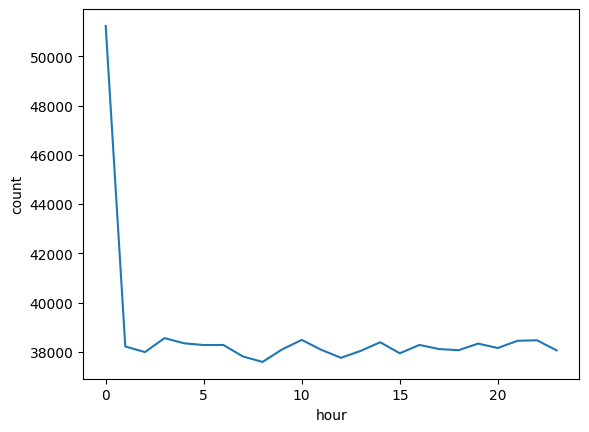

In [102]:
sns.lineplot(data=transactions['hour'].value_counts().sort_index().reset_index(),x='hour',y='count')

Для SQL

In [103]:
con = duckdb.connect(':memory:')
con.register('clients', clients)
con.register('transactions', transactions)
con.register('categories', categories)
con.register('subscriptions', subscriptions)

## Вывод

**Объём данных достаточен**:
- 929 000 транзакций за 2020 год
- 1000 клиентов (активны 1000 в транзакциях)

**Проблемы данных:**
| Таблица | Критичные пропуски   |
|---------|--------------------  |
| clients | income, credit, deposit|
| transactions | product_company |
| subscriptions | date_end       |